In [89]:
from bs4 import BeautifulSoup
import nltk
from nltk import word_tokenize
from collections import Counter
import pandas as pd
from matplotlib import pyplot as plt
from glob import glob
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
%ls

book1.xml  book3.xml  book5.xml  book7.xml  scripts/
book2.xml  book4.xml  book6.xml  book8.xml  Untitled.ipynb


In [92]:
glob('*.xml')

['book1.xml',
 'book2.xml',
 'book5.xml',
 'book3.xml',
 'book4.xml',
 'book7.xml',
 'book8.xml',
 'book6.xml']

In [55]:
b1 = open('book1.xml').read()

In [56]:
soup = BeautifulSoup(b1)

In [93]:
allBooks = [open(fn).read() for fn in sorted(glob('*.xml'))]

In [95]:
[len(book) for book in allBooks]

[281979, 253000, 219708, 258718, 243554, 249330, 224385, 244469]

In [96]:
allSoups = [BeautifulSoup(book) for book in allBooks]

# About Dictionaries

In [16]:
inventory = {"apples": 3, "oranges": 17, "bananas": 1000}

In [17]:
inventory['bananas']

1000

In [18]:
inventory['bananas'] = 10

In [19]:
inventory

{'apples': 3, 'oranges': 17, 'bananas': 10}

# Make a Dictionary of all Characters and all their Dialogue

In [58]:
dialogue = soup.findAll('said')

In [25]:
dialogueDict = {}
for utterance in dialogue: 
    if 'who' in utterance.attrs:
        char = utterance.attrs['who']
        if char not in dialogueDict: 
            dialogueDict[char] = [utterance.text]
        if char in dialogueDict: 
            dialogueDict[char].append(utterance.text)

In [26]:
dialogueDict

{'#Celia': [" Dorothea, dear, if you don't mind—if you are not very busy—suppose\nwe looked at mamma's jewels to-day, and divided them?  It is exactly\nsix months to-day since uncle gave them to you, and you have not looked\nat them yet.",
  " Dorothea, dear, if you don't mind—if you are not very busy—suppose\nwe looked at mamma's jewels to-day, and divided them?  It is exactly\nsix months to-day since uncle gave them to you, and you have not looked\nat them yet.",
  'It is the last day of September now, and it was the first of April\nwhen uncle gave them to you.  You know, he said that he had forgotten\nthem till then.  I believe you have never thought of them since you\nlocked them up in the cabinet here.',
  "I think, dear, we are wanting\nin respect to mamma's memory, to put them by and take no notice of\nthem.  And,",
  'necklaces are quite usual now; and Madame Poincon, who\nwas stricter in some things even than you are, used to wear ornaments.\nAnd Christians generally—surely th

In [32]:
numUtterances = [(char, len(utterances)) for char, utterances in dialogueDict.items()]
    

In [37]:
chars = [item[0] for item in numUtterances]
numUtts = [item[1] for item in numUtterances]
print(chars, numUtts)

['#Celia', '#D', '#MB', '#JC', '#C', '#MrsCad', 'JC', '#MC', '#MrCad', '#Lad', '#Standish', '#B', '#LC', '#MrV', '#Lyd', '#MrsV', '#R', '#F', '#MrF', '#MrsWaule', '#M'] [78, 142, 84, 61, 47, 61, 2, 2, 20, 2, 2, 5, 16, 3, 5, 27, 82, 57, 36, 10, 37]


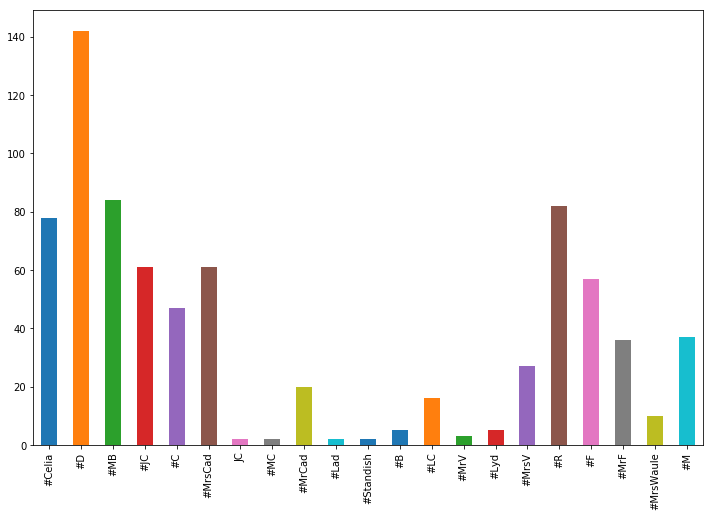

In [42]:
pd.Series(numUtts, index=chars).plot(kind='bar')

# Get all Celia Text and Analyze

In [57]:
celias = soup.findAll('said', attrs={'who': '#Celia'})

In [17]:
celias[0].get_text()

" Dorothea, dear, if you don't mind—if you are not very busy—suppose\nwe looked at mamma's jewels to-day, and divided them?  It is exactly\nsix months to-day since uncle gave them to you, and you have not looked\nat them yet."

In [20]:
celiaStrings = [utterance.get_text() for utterance in celias]

In [23]:
allCelias = ' '.join(celiaStrings)

In [33]:
celiasText = nltk.Text(nltk.word_tokenize(allCelias))

In [36]:
celiasText.concordance('Dodo')

Displaying 13 of 13 matches:
 who wore jewels . They are here , O Dodo , you must keep the cross yourself .
n them ? Mr. Casaubon is so sallow . Dodo ! I wonder you show temper , Dorothe
e talks very little , He thinks that Dodo cares about him , and she only cares
at Sir James tries and fails . Now , Dodo , can you really believe that ? Pray
o not make that mistake any longer , Dodo . When Tantripp was brushing my hair
 is quite plain . That 's your way , Dodo . Wait a little . Think about it . Y
ll be nobody besides Lovegood . Poor Dodo , It is very hard : it is your favor
n at home to lunch . Do n't sit up , Dodo , you are so pale to-night : go to b
 hear him eat his soup so . Really , Dodo , ca n't you hear how he scrapes his
f I have said anything to hurt you , Dodo , She is engaged to marry Mr. Casaub
hink he would have suited Dorothea . Dodo is very strict . She thinks so much 
se her . Please do n't be angry with Dodo ; she does not see things . She thou
ave been pleasanter tha

In [39]:
celiasText.collocations()

Sir James; Mr. Casaubon; great soul; Mrs. Cadwallader; uncle gave;
wear ornaments; quite young; would suit; must keep; one else; quite
sure; n't think


In [45]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jon/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [50]:
celiasPOS = nltk.pos_tag(celiasText)

In [58]:
Counter(celiasPOS).most_common(20)

[((',', ','), 79),
 (('.', '.'), 79),
 (('you', 'PRP'), 41),
 (('to', 'TO'), 37),
 (('I', 'PRP'), 36),
 (('is', 'VBZ'), 23),
 (('he', 'PRP'), 19),
 (('and', 'CC'), 18),
 (('a', 'DT'), 18),
 (('it', 'PRP'), 17),
 (('not', 'RB'), 16),
 (('the', 'DT'), 16),
 (('that', 'IN'), 16),
 (('them', 'PRP'), 15),
 (('be', 'VB'), 15),
 (('are', 'VBP'), 14),
 (('would', 'MD'), 13),
 (('?', '.'), 12),
 (('Dodo', 'NNP'), 12),
 (('very', 'RB'), 11)]

In [56]:
celiasPOS[:10]

[('Dorothea', 'NNP'),
 (',', ','),
 ('dear', 'NN'),
 (',', ','),
 ('if', 'IN'),
 ('you', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('mind—if', 'VB'),
 ('you', 'PRP')]

In [55]:
# Proper nouns that Celia uses (in book 1)
Counter([pair[0] for pair in celiasPOS if pair[1] == 'NNP']).most_common(10)

[('Dodo', 12),
 ('Sir', 10),
 ('James', 10),
 ('Dorothea', 9),
 ('Mr.', 7),
 ('Casaubon', 7),
 ('Locke', 2),
 ('Tantripp', 2),
 ('Mrs.', 2),
 ('Cadwallader', 2)]

In [59]:
# Celia's favorite adjectives
Counter([pair[0] for pair in celiasPOS if pair[1] == 'JJ']).most_common(10)

[('sure', 5),
 ('much', 5),
 ('little', 3),
 ('great', 3),
 ('sorry', 3),
 ('to-day', 2),
 ('first', 2),
 ('usual', 2),
 ('dreadful', 2),
 ('pleased', 2)]

# Ratios of Free-Indirect Discourse

In [64]:
chaps = soup.findAll('div') # make a list of chapters
len(chaps)

12

In [74]:
chapsAndCounts = {i: {} for i in range(12)}
for i, chap in enumerate(chaps): 
    chapsAndCounts[i] = {"saids": len(chap.findAll('said')), "fids": len(chap.findAll('fid'))}
chapsAndCounts

{0: {'saids': 0, 'fids': 0},
 1: {'saids': 71, 'fids': 14},
 2: {'saids': 35, 'fids': 24},
 3: {'saids': 69, 'fids': 12},
 4: {'saids': 40, 'fids': 15},
 5: {'saids': 81, 'fids': 17},
 6: {'saids': 23, 'fids': 6},
 7: {'saids': 46, 'fids': 8},
 8: {'saids': 89, 'fids': 17},
 9: {'saids': 62, 'fids': 21},
 10: {'saids': 95, 'fids': 9},
 11: {'saids': 164, 'fids': 28}}

In [79]:
chapsAndCounts = {i: {} for i in range(12)}
for i, chap in enumerate(chaps): 
    chapsAndCounts[i] = {"saids": countWordsInChap('said', chap), "fids": countWordsInChap('fid', chap)}
chapsAndCounts

{0: {'saids': 0, 'fids': 0},
 1: {'saids': 1673, 'fids': 1208},
 2: {'saids': 1108, 'fids': 2624},
 3: {'saids': 1998, 'fids': 692},
 4: {'saids': 1019, 'fids': 1373},
 5: {'saids': 2540, 'fids': 1378},
 6: {'saids': 741, 'fids': 707},
 7: {'saids': 1342, 'fids': 579},
 8: {'saids': 1946, 'fids': 1267},
 9: {'saids': 1471, 'fids': 2035},
 10: {'saids': 1919, 'fids': 757},
 11: {'saids': 3453, 'fids': 2188}}

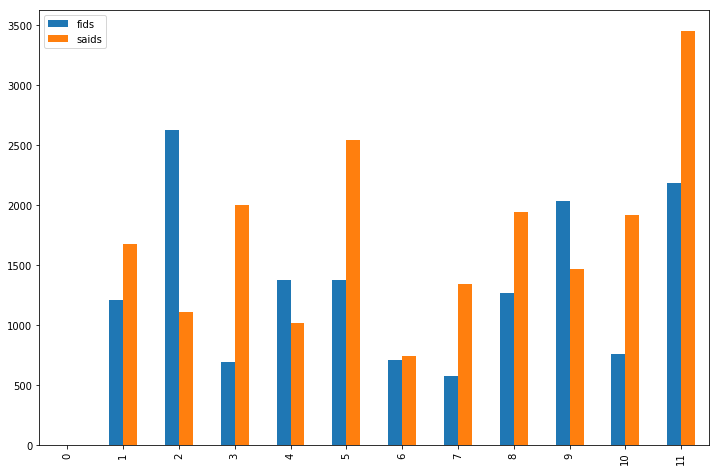

In [83]:
df = pd.DataFrame(chapsAndCounts)
df.T.plot(kind='bar')

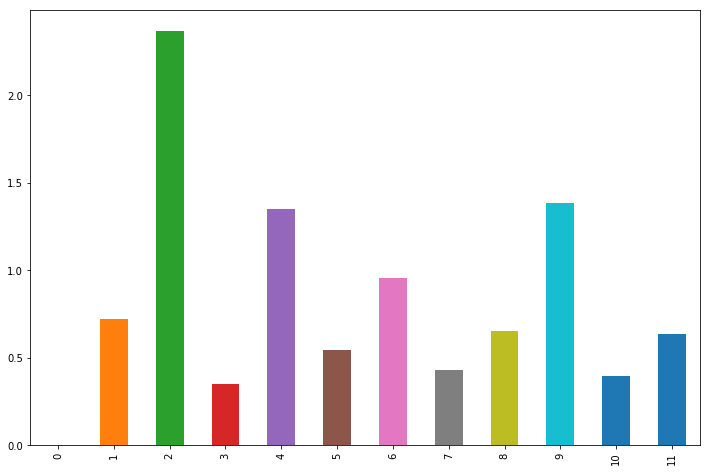

In [88]:
ratios = df.T['fids'] / df.T['saids']
ratios.plot(kind='bar')

In [76]:
def countWordsInChap(tag, chap):
    utterances = chap.findAll(tag)
    tally = 0 
    for utt in utterances:
        tokens = word_tokenize(utt.text)
        tally += len(tokens)
    return tally

In [69]:
for i, item in enumerate(['apples', 'oranges']):
    print(i, item)

0 apples
1 oranges


In [65]:
for i in range(3): 
    print(i)

0
1
2


In [61]:
fid = soup.findAll('fid')
len(fid)

188